`About Dataset`
Information Related To The Dataset:

1️⃣Date: This column represents the calender date when the data about the stock is recorded.

2️⃣Open: This column represents the first recorded price of the stock for a trading session.

3️⃣High: The high price represents the highest traded price of the stock during a given trading session. It reflects the peak value that the stock reached during the day.

4️⃣Low: The low price is the lowest traded price of the stock during a specific trading session. It indicates the minimum value that the stock reached during the day.

5️⃣Close: The closing price is the last traded price of the stock at the end of a trading session. It reflects the final value at which the stock was traded before the market closes.

6️⃣Adj Close(Adjusted Close): The adjusted closing price accounts for corporate actions, such as dividends, stock splits, and new stock offerings, that may affect the stock's price but are not directly related to its performance. The adjusted close is often used to assess the stock's performance over time.

7️⃣Volume: Volume represents the total number of shares traded during a specific time period. It gives an indication of the level of market activity and liquidity for that stock. High volume often suggests increased investor interest, while low volume may indicate less active trading.

A financial dataset with columns such as Date, Open, High, Low, Close, Adj Close, and Volume information is crucial for technical analysis, trend identification, and understanding the historical performance of a stock.

Feel free to use this dataset for your analyses, visualisations, and research. Your feedback is appreciated!

In [1]:
import numpy as np
import pandas as pd
import pandas_datareader as web
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, LSTM
plt.style.use('fivethirtyeight')

import warnings

warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("/content/MSFT.csv")

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.061434,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.063628,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.064725,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.063079,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.061982,47894400


In [4]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
9078,2022-03-18,295.369995,301.000000,292.730011,300.429993,300.429993,43317000
9079,2022-03-21,298.890015,300.140015,294.899994,299.160004,299.160004,28351200
9080,2022-03-22,299.799988,305.000000,298.769989,304.059998,304.059998,27599700
9081,2022-03-23,300.510010,303.230011,297.720001,299.489990,299.489990,25715400
9082,2022-03-24,299.140015,304.200012,298.320007,304.100006,304.100006,24446900


In [5]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [6]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,9083.000000,9083.000000,9083.000000,9083.000000,9083.000000,9.083000e+03
mean,41.324936,41.760887,40.878488,41.335628,36.256120,5.875055e+07
std,59.696905,60.272218,59.081728,59.714567,59.981436,3.845200e+07
min,0.088542,0.092014,0.088542,0.090278,0.057046,2.304000e+06
25%,4.050781,4.102051,4.027344,4.075195,2.575089,3.461230e+07
50%,26.820000,27.100000,26.520000,26.840000,18.948530,5.203200e+07
75%,40.034999,40.443751,39.500000,39.937500,29.244812,7.265400e+07
max,344.619995,349.670013,342.200012,343.109985,342.402008,1.031789e+09


In [7]:
df.shape

(9083, 7)

In [8]:
df.duplicated().sum()

0

#Visualize the closing prices #

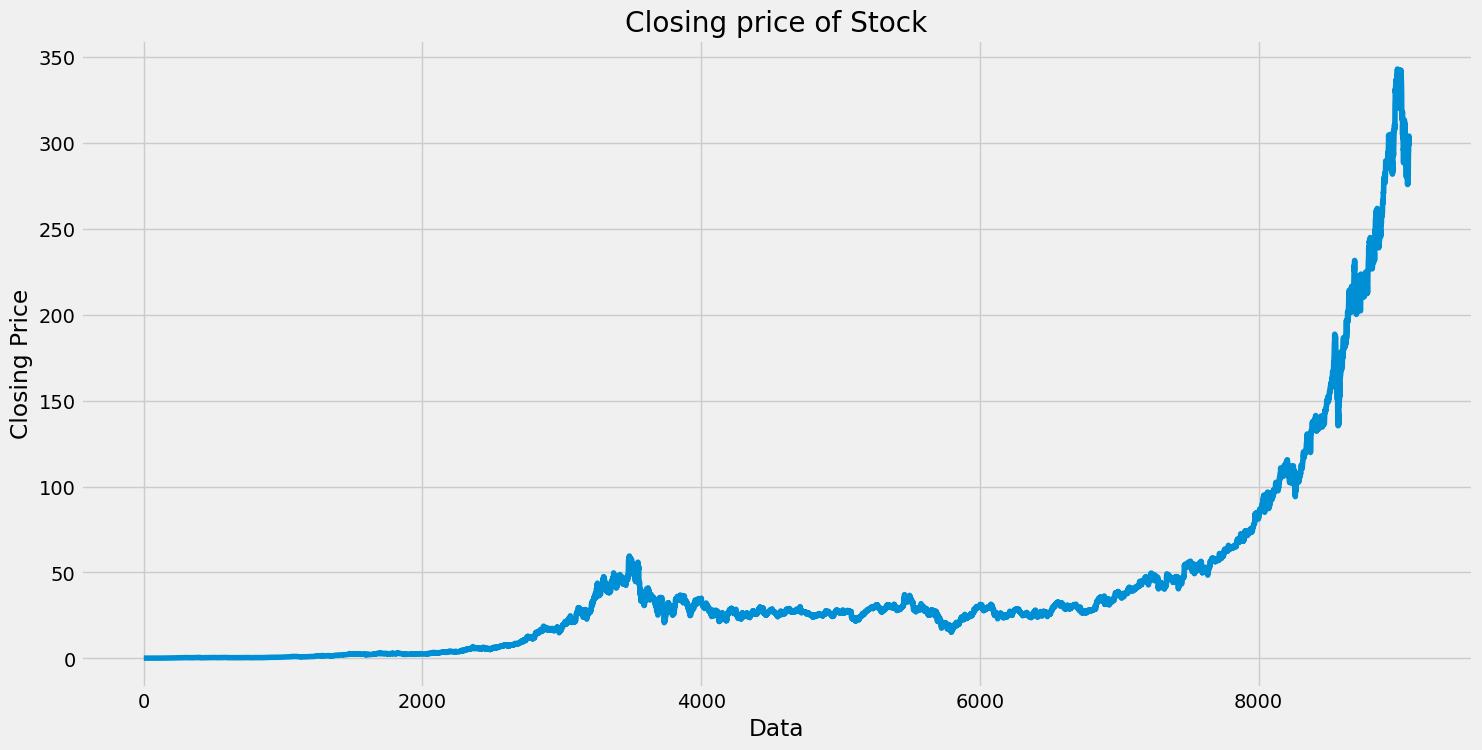

In [9]:
plt.figure(figsize=(16,8))
plt.title("Closing price of Stock")
plt.plot(df["Close"])
plt.xlabel("Data")
plt.ylabel("Closing Price")
plt.show()

In [10]:
data=df.filter(["Close"])
dataset=data.values
traning_data_len = math.ceil(len(dataset)*0.8)
traning_data_len

7267

هذا الكود يقوم بإجراء عمليات على البيانات باستخدام مكتبة Pandas و NumPy. دعني أشرح الخطوات بالتفصيل:

1. `data=df.filter(["Close"])`: هذا السطر يقوم بتحديد البيانات المتاحة في العمود "Close" من DataFrame الذي يُعرف باسم `df`. يتم استخدام `filter()` لتحديد العمود المحدد.

2. `dataset=data.values`: هنا يتم تحويل البيانات التي تمت تحديدها في الخطوط السابقة إلى قائمة NumPy باستخدام الأمر `values`، لذلك الآن `dataset` يحتوي على قائمة بالقيم في العمود "Close".

3. `traning_data_len = math.ceil(len(dataset)*0.8)`: يتم هنا حساب عدد البيانات التي سيتم استخدامها في عملية التدريب. يتم ذلك بحساب 80% من طول البيانات الإجمالي وتقريب النتيجة إلى الأعلى باستخدام `math.ceil()`، وهذا العدد يُخزن في متغير يُسمى `traning_data_len`.

4. `traning_data_len`: هذا السطر يقوم بطباعة قيمة `traning_data_len`، والتي تمثل عدد البيانات التي ستُستخدم في عملية التدريب.

هذه الخطوات تمثل جزءاً من عملية تحضير البيانات لاستخدامها في عمليات التدريب أو التحليل أو الاستكشاف في علوم البيانات وتعلم الآلة.

In [11]:
#scale the data
scaler=StandardScaler()
scaled_data=scaler.fit_transform(dataset)
print("MEAN of processed data: ",scaled_data.mean())
print("Standard deviation of processed data: ",scaled_data.std())

MEAN of processed data:  1.0013153162753806e-16
Standard deviation of processed data:  1.0


print("MEAN of processed data: ",scaled_data.mean()): يتم طباعة متوسط البيانات المعالجة بعد التحويل. يتم الحصول على هذا الرقم باستخدام الأمر mean() على البيانات المعالجة (scaled_data).

print("Standard deviation of processed data: ",scaled_data.std()): يتم طباعة الانحراف المعياري للبيانات المعالجة بعد التحويل. يتم الحصول على هذا الرقم باستخدام الأمر std() على البيانات المعالجة (scaled_data).

هذه الخطوات تهدف إلى تحويل البيانات إلى توزيع معين (متوسط معين وانحراف معياري معين)، وهو يساعد في تحسين أداء بعض الخوارزميات والنماذج التحليلية والتنبؤية في تعلم الآلة وعلوم البيانات.

In [12]:
scaled_data

array([[-0.69063008],
       [-0.69057193],
       [-0.69054284],
       ...,
       [ 4.39991192],
       [ 4.32337683],
       [ 4.40058194]])

In [13]:
#create the training data
#create scaled training dataset
train_data = scaled_data[0:traning_data_len, :]
#split the data to x_train and y_train
x_train=[]
y_train=[]
for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i])
  y_train.append(train_data[i])

هذا الكود يقوم بإنشاء مجموعة البيانات التدريبية بعد تحويل البيانات وتقسيمها إلى مجموعات `x_train` و `y_train` التي يمكن استخدامها لتدريب نموذج التنبؤ. سأقدم شرحًا للخطوات:

1. `train_data = scaled_data[0:traning_data_len, :]`: يتم استخدام البيانات المقيّسة (`scaled_data`) لإنشاء مجموعة بيانات التدريب. يتم تحديد هذه المجموعة بواسطة تقسيم `scaled_data` من الصفر إلى `traning_data_len`، وذلك لاستخدام جزء معين من البيانات للتدريب.

2. `x_train=[]` و `y_train=[]`: يتم إنشاء قوائم فارغة لتخزين البيانات التي ستستخدم كمدخلات (`x_train`) والبيانات التي ستستخدم كمخرجات (`y_train`).

3. الحلقة `for i in range(60,len(train_data)):` تقوم بتكرار عملية إنشاء مجموعات `x_train` و `y_train` لكل نقطة بيانات في مجموعة البيانات التدريبية. يبدأ الفهرس `i` من 60، لأنه يستخدم 60 نقطة بيانات لتشكيل كل مدخلة في `x_train`.

4. `x_train.append(train_data[i-60:i])`: يتم إضافة مجموعة البيانات المؤلفة من الـ 60 نقطة السابقة كقيمة لقائمة `x_train`.

5. `y_train.append(train_data[i])`: يتم إضافة البيانات التالية لمجموعة البيانات المؤلفة من الـ 60 نقطة كقيمة لقائمة `y_train`. هذه البيانات هي التي يجب أن يتنبأ النموذج بها.

بعد هذه الخطوات، ستكون لديك مجموعات `x_train` و `y_train` التي يمكن استخدامها لتدريب نموذج التنبؤ. كل قيمة في `x_train` تحتوي على سلسلة زمنية من البيانات، بينما كل قيمة في `y_train` تمثل البيانات التي يجب على النموذج التنبؤ بها بناءً على البيانات الموجودة في المدخلات المقابلة في `x_train`.

In [14]:
x_train,y_train=np.array(x_train),np.array(y_train)
x_train.shape

(7207, 60, 1)

In [15]:
#reshape the data
print("x_train shape before reshaping",x_train.shape)
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1)) #np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
print("x_train shape after reshaping",x_train.shape)

x_train shape before reshaping (7207, 60, 1)
x_train shape after reshaping (7207, 60, 1)


الكود الذي وضعته يقوم بإعادة تشكيل بيانات التدريب `x_train` لضمان توافقها مع تنسيق البيانات المقبول من قبل طبقات الشبكات العصبية العميقة مثل LSTM في Keras.

دعوني أشرح الخطوات:

1. `x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))`: يتم استخدام الدالة `reshape()` من NumPy لإعادة تشكيل بيانات التدريب `x_train`. الأبعاد الجديدة هي `(x_train.shape[0], x_train.shape[1], 1)`، حيث يمثل `x_train.shape[0]` عدد العينات (الصفوف)، و `x_train.shape[1]` هو عدد الأيام/الخطوط في كل مجموعة، و `1` هو عمق البيانات (في هذه الحالة سيكون لدينا قيمة واحدة لكل نقطة).

2. `print("x_train shape after reshaping",x_train.shape)`: يتم طباعة شكل بيانات التدريب بعد إعادة التشكيل. هذا يُظهر التغيير في الشكل بعد عملية إعادة التشكيل.

بعد هذه الخطوات، ستكون لديك بيانات التدريب `x_train` معروضة بالشكل الصحيح لاستخدامها في شبكات LSTM أو RNN أخرى في Keras.

In [16]:
#build LSTM model
model= Sequential()
model.add(LSTM(200,return_sequences=True,input_shape=(x_train.shape[1], 1)))
model.add(LSTM(200,return_sequences=False))
model.add(Dense(100))
model.add(Dense(50))
model.add(Dense(1))

هذا الكود يقوم ببناء نموذج LSTM باستخدام مكتبة Keras. دعوني أشرح كل خطوة:

1. `model= Sequential()`: يقوم بإنشاء مثيل لنموذج Sequential. Sequential هو نموذج في Keras يمكن استخدامه لبناء نماذج تتكون من طبقات متتالية.

2. `model.add(LSTM(200,return_sequences=True,input_shape=(x_train.shape[1], 1)))`: يتم إضافة طبقة LSTM إلى النموذج. تحتوي هذه الطبقة على 200 وحدة LSTM وتُعيد سلاسل البيانات (`return_sequences=True`)، كما أنها تأخذ شكل البيانات كإدخال (`input_shape=(x_train.shape[1], 1)`).

3. `model.add(LSTM(200,return_sequences=False))`: يتم إضافة طبقة LSTM أخرى إلى النموذج. تحتوي هذه الطبقة أيضًا على 200 وحدة LSTM ولكنها لا تُعيد سلاسل البيانات (`return_sequences=False`)، وهذا يعني أنها تُستخدم كطبقة LSTM أخيرة في النموذج.

4. `model.add(Dense(100))`: يتم إضافة طبقة متصلة (Dense) مع 100 وحدة.

5. `model.add(Dense(50))`: يتم إضافة طبقة متصلة (Dense) أخرى مع 50 وحدة.

6. `model.add(Dense(1))`: يتم إضافة طبقة متصلة (Dense) أخيرة مع وحدة واحدة، وهذه الطبقة تُستخدم لإنتاج الناتج النهائي.

باستخدام هذه الطبقات، يتم بناء نموذج LSTM المكوّن من طبقتين LSTM تُعيد سلاسل البيانات، وطبقات متصلة (Dense) لإضافة قواميس تعلمية على النموذج، والطبقة النهائية التي تُنتج الناتج المتوقع.

In [17]:
#compile the model
model.compile(optimizer='adam',loss='mean_squared_error')

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 200)           161600    
                                                                 
 lstm_1 (LSTM)               (None, 200)               320800    
                                                                 
 dense (Dense)               (None, 100)               20100     
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 507601 (1.94 MB)
Trainable params: 507601 (1.94 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
#train the model
history = model.fit(x_train,y_train,epochs=5)

Epoch 1/5
226/226 [==============================] - 13s 19ms/step - loss: 0.0024
Epoch 2/5
226/226 [==============================] - 3s 15ms/step - loss: 2.2242e-04
Epoch 3/5
226/226 [==============================] - 4s 16ms/step - loss: 2.0058e-04
Epoch 4/5
226/226 [==============================] - 4s 16ms/step - loss: 1.9318e-04
Epoch 5/5
226/226 [==============================] - 4s 16ms/step - loss: 2.0334e-04


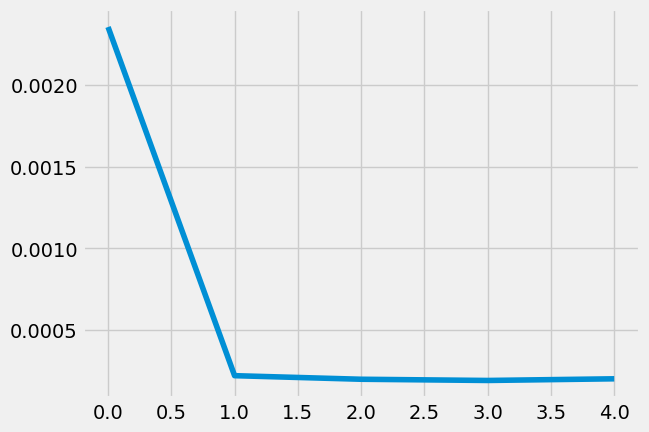

In [20]:
plt.plot(history.history['loss'])

In [21]:
#create the testing dataset
#createt new array
test_data=scaled_data[traning_data_len-60:, :]
#create the dataset x_test and y_test
x_test=[]
y_test=dataset[traning_data_len: , :]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i, 0])

في هذا الكود، يتم إنشاء مجموعة بيانات الاختبار بناءً على البيانات المقيّسة. سأشرح الخطوات بالتفصيل:

1. `test_data=scaled_data[traning_data_len-60:, :]`: يتم إنشاء مجموعة بيانات الاختبار باستخدام البيانات المقيّسة. تبدأ مجموعة البيانات الاختبارية من الفهرس `traning_data_len - 60` وتمتد حتى نهاية البيانات.

2. `x_test=[]` و `y_test=dataset[traning_data_len: , :]`: يتم إنشاء قوائم فارغة لتخزين مدخلات الاختبار (`x_test`) والمخرجات المتوقعة (`y_test`). المخرجات `y_test` تكون مستندة إلى القيم الفعلية في البيانات غير المقيّسة (`dataset`) لاحقًا.

3. الحلقة `for i in range(60,len(test_data)):` تقوم بتكرار عملية إنشاء مجموعات `x_test` و `y_test` لكل نقطة بيانات في مجموعة البيانات الاختبارية. تبدأ الفهرس `i` من 60، لأنه يستخدم 60 نقطة بيانات لتشكيل كل مدخلة في `x_test`.

4. `x_test.append(test_data[i-60:i, 0])`: يتم إضافة مجموعة البيانات المؤلفة من الـ 60 نقطة السابقة كقيمة لقائمة `x_test`. الفهرس `0` يُستخدم للوصول إلى العمود الأول (العمود "Close") من `test_data`.

بعد تنفيذ هذه الخطوات، ستحصل على مجموعات `x_test` و `y_test` التي يمكن استخدامها لاختبار الأداء لنموذجك بعد التدريب. تحتوي `x_test` على سلاسل زمنية من البيانات التي يمكن استخدامها كمدخلات لنموذجك، بينما تحتوي `y_test` على القيم الحقيقية التي يجب أن يتنبأ بها النموذج.

In [22]:
#convert the data to numpy
x_test=np.array(x_test)

In [23]:
#reshape the data
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [24]:
#get the model predicted value
predictions =model.predict(x_test)
predictions=scaler.inverse_transform(predictions)
print(predictions)

57/57 [==============================] - 1s 6ms/step
[[ 46.1506 ]
 [ 46.23816]
 [ 46.42601]
 ...
 [270.88666]
 [274.55856]
 [276.80005]]


هذا الكود يقوم بتنفيذ توقعات النموذج على مجموعة البيانات الاختبارية (`x_test`) ويقوم بتحويل القيم المقيّسة للتنبؤات إلى قيم غير مقيّسة باستخدام المقياس العكسي. سأقوم بشرح الخطوات:

1. `predictions = model.predict(x_test)`: يتم استخدام النموذج المدرب لتوقع القيم المستقبلية باستخدام بيانات الاختبار `x_test`. النتيجة هي مصفوفة من التنبؤات.

2. `predictions=scaler.inverse_transform(predictions)`: بعد الحصول على التنبؤات بالقيم المقيّسة، يتم استخدام المقياس العكسي (`inverse_transform`) لتحويل هذه التنبؤات إلى قيم غير مقيّسة.

3. `print(predictions)`: يتم طباعة التنبؤات النهائية، والتي تمثل القيم الغير مقيّسة المتوقعة من النموذج للبيانات الاختبارية.

بهذه الطريقة، يمكنك الحصول على التنبؤات النهائية للبيانات الاختبارية باستخدام النموذج المدرب، وتحويل القيم المقيّسة إلى قيم غير مقيّسة لسهولة فهم النتائج والمقارنة مع القيم الفعلية.